# BlackHole Temperature Evolution using Quantum Computing

### Import requires Libaraies

In [27]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [28]:
pip install qiskit-aer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Defining the Quantum Registers and Qubits

In [29]:
from qiskit_aer import StatevectorSimulator

In [30]:
num_qubits = 1
qreg = QuantumRegister(num_qubits, 'q')
qc = QuantumCircuit(1)

G = 6.67430e-11
h_bar = 1.0545718e-34
speed_of_light = 3.00e8
spin_bh = 0.2

## Define the functions Required

In [31]:
def apply_black_hole_properties(qc, mass, spin, qreg):
    qc.rx(2 * np.arcsin(np.sqrt(spin)), qreg[0])
    qc.rz(mass * np.pi, qreg[0])

### Black Hole Properties

The function `apply_black_hole_properties` applies quantum gates to a quantum circuit (`qc`) to represent the properties of a black hole. Let's break down each line:

1. `qc.rx(2 * np.arcsin(np.sqrt(spin)), qreg[0])`: This line applies an X-axis rotation gate (`rx`) to the qubit at the 0th index of the quantum register `qreg`. The angle of rotation is determined by `2 * np.arcsin(np.sqrt(spin))`. Here, `spin` is typically a parameter representing the spin of the black hole.

2. `qc.rz(mass * np.pi, qreg[0])`: This line applies a Z-axis rotation gate (`rz`) to the same qubit. The angle of rotation is determined by `mass * np.pi`. Here, `mass` is the mass of the black hole. The gate is applied to simulate the effect of mass on the quantum state.

Overall, these gates manipulate the quantum state of the qubit in the quantum register to represent the properties of a black hole, specifically its spin and mass. These gates are part of quantum circuits designed to simulate phenomena related to black holes in quantum computing.


In [32]:
def calculate_temperature(mass):
    qc = QuantumCircuit(qreg)
    apply_black_hole_properties(qc, mass, spin_bh, qreg)
    
    backend =  StatevectorSimulator()
    new_circuit = transpile(qc,backend)
    job = backend.run(new_circuit)
    result = job.result()
    statevector = result.get_statevector()
    
    avg_energy = np.real(np.vdot(statevector, np.dot(h_bar * speed_of_light**3 / (8 * np.pi * G), statevector)))
    
    temperature = avg_energy / (3.15e7 * mass)  # 3.15e7 is a conversion factor for time
    return temperature

### Calculation of Black Hole Temperature

The function `calculate_temperature` calculates the temperature of a black hole based on its mass. Let's break down each line:

1. `qc = QuantumCircuit(qreg)`: This line initializes a quantum circuit `qc` with a quantum register `qreg`. The quantum register typically represents the qubits in the quantum system.

2. `apply_black_hole_properties(qc, mass, spin_bh, qreg)`: This line calls the function `apply_black_hole_properties` to apply quantum gates to the quantum circuit `qc`, simulating the properties of a black hole. The `mass` parameter represents the mass of the black hole, and `spin_bh` typically represents its spin.

3. `backend = StatevectorSimulator()`: This line initializes a backend simulator `StatevectorSimulator()` for executing the quantum circuit.

4. `new_circuit = transpile(qc, backend)`: This line transpiles (optimizes) the quantum circuit `qc` for the given backend simulator `backend`.

5. `job = backend.run(new_circuit)`: This line executes the transpiled quantum circuit on the backend simulator, resulting in a job object `job`.

6. `result = job.result()`: This line retrieves the result of the executed job.

7. `statevector = result.get_statevector()`: This line retrieves the statevector of the quantum system after the execution of the circuit.

8. `avg_energy = np.real(np.vdot(statevector, np.dot(h_bar * speed_of_light**3 / (8 * np.pi * G), statevector)))`: This line calculates the average energy of the black hole based on its statevector. Here, `h_bar` represents the reduced Planck constant, `speed_of_light` represents the speed of light in vacuum, and `G` represents the gravitational constant.

9. `temperature = avg_energy / (3.15e7 * mass)`: This line calculates the temperature of the black hole using the formula for Hawking temperature, where `3.15e7` is a conversion factor for time. The calculated temperature is returned as the output of the function.

Overall, this function simulates the properties of a black hole using a quantum circuit and calculates its temperature based on its mass.


In [33]:
def Calc(arr):
    plt.figure(figsize=(8, 6))

    for initial_mass_str in arr:
        initial_mass = float(initial_mass_str)

        t_max = 100
        delta_t = 1

        time = np.arange(0, t_max, delta_t)
        masses_bh = initial_mass * np.exp(-0.1 * time)

        temperature_data = []

        for i, mass_bh in enumerate(masses_bh):
            temperature = calculate_temperature(mass_bh)
            temperature_data.append(temperature)

        plt.plot(time, temperature_data, label=f"Mass: {initial_mass} kg")
        plt.xlabel("Time (quantum time units)")
        plt.ylabel("Temperature (K)")
        plt.title("Black Hole Temperature vs. Time")
        plt.legend()
        plt.grid()
        plt.tight_layout()


### Calculation of Black Hole Temperature Over Time

The function `Calc` plots the variation of black hole temperature over time for different initial masses. Let's break down each line:

1. `plt.figure(figsize=(8, 6))`: This line initializes a new figure for plotting with a specified figure size.

2. `for initial_mass_str in arr:`: This line starts a loop iterating over each initial mass value in the input array `arr`.

3. `initial_mass = float(initial_mass_str)`: This line converts the initial mass value from string format to a floating-point number.

4. `t_max = 100` and `delta_t = 1`: These lines define the maximum time and the time step for the time axis of the plot.

5. `time = np.arange(0, t_max, delta_t)`: This line generates an array of time values from 0 to `t_max` with a step size of `delta_t`.

6. `masses_bh = initial_mass * np.exp(-0.1 * time)`: This line calculates the black hole masses over time using an exponential decay function. The mass decreases exponentially with time.

7. `temperature_data = []`: This line initializes an empty list to store the calculated temperatures over time.

8. Nested loop:
    - `for i, mass_bh in enumerate(masses_bh):`: This line starts a loop iterating over each black hole mass and its corresponding index.
    - `temperature = calculate_temperature(mass_bh)`: This line calculates the temperature of the black hole for the current mass using the `calculate_temperature` function.
    - `temperature_data.append(temperature)`: This line appends the calculated temperature to the list `temperature_data`.

9. `plt.plot(time, temperature_data, label=f"Mass: {initial_mass} kg")`: This line plots the variation of temperature over time for the current initial mass. The time values are plotted on the x-axis, and the temperature values are plotted on the y-axis.

10. `plt.xlabel("Time (quantum time units)")`: This line sets the label for the x-axis to "Time (quantum time units)".

11. `plt.ylabel("Temperature (K)")`: This line sets the label for the y-axis to "Temperature (K)".

12. `plt.title("Black Hole Temperature vs. Time")`: This line sets the title of the plot to "Black Hole Temperature vs. Time".

13. `plt.legend()`: This line displays the legend on the plot, showing the label for each plotted curve.

14. `plt.grid()`: This line adds a grid to the plot for better visualization.

15. `plt.tight_layout()`: This line adjusts the layout of the plot to ensure all elements fit without overlapping.

The function `Calc` generates a plot showing how the temperature of a black hole changes over time for different initial masses.


## Testing the functions defined

In [34]:
apply_black_hole_properties(qc,45,2,qreg)

/var/folders/vk/1wl47y5s0y11p511c75cq_2r0000gn/T/ipykernel_6172/1834695577.py:2: RuntimeWarning: invalid value encountered in arcsin
  qc.rx(2 * np.arcsin(np.sqrt(spin)), qreg[0])


In [35]:
calculate_temperature(50)

1.077739440724555e-09

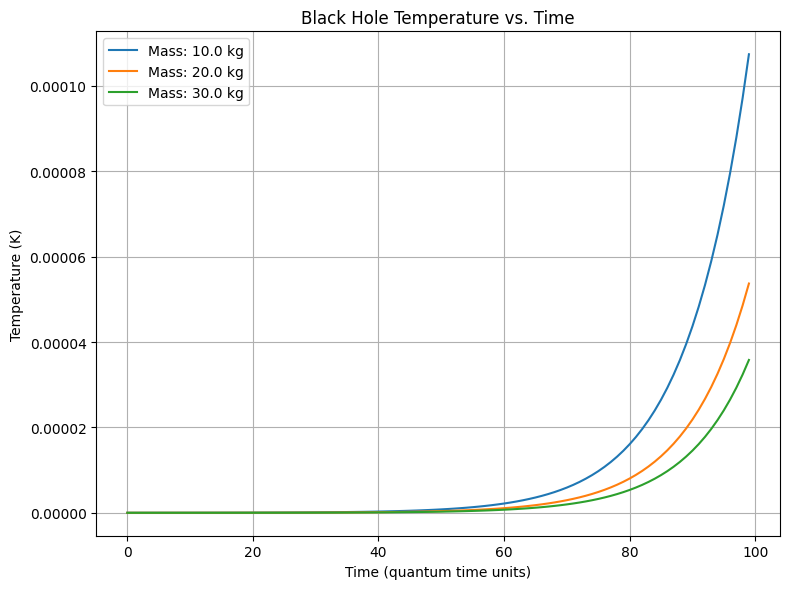

In [36]:
arr = ['10', '20', '30']  # Initial masses
Calc(arr)
plt.show()

### The funtions executes
Now we have the functions and theey are running as we expected next we have to create a CSV file using a script which is named as script.py in this folder

## Running using the Synthetically generated Data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Calc_csv(csv_file):
    dataset = pd.read_csv(csv_file)
    initial_masses = dataset['Initial_Mass']
    time_columns = [col for col in dataset.columns if col.startswith('time_')]
    time_data = dataset[time_columns]

    plt.figure(figsize=(8, 6))

    for i, initial_mass in enumerate(initial_masses):
       
        time_series = time_data.iloc[i]

        
        masses_bh = initial_mass * np.exp(-0.1 * time_series)

        temperature_data = []

   
        for mass_bh in masses_bh:
            temperature = calculate_temperature(mass_bh)  
            temperature_data.append(temperature)

        plt.plot(time_series, temperature_data, label=f"Mass: {initial_mass} kg")

    plt.xlabel("Time (quantum time units)")
    plt.ylabel("Temperature (K)")
    plt.title("Black Hole Temperature vs. Time")
    plt.grid()
    plt.tight_layout()
    plt.show()

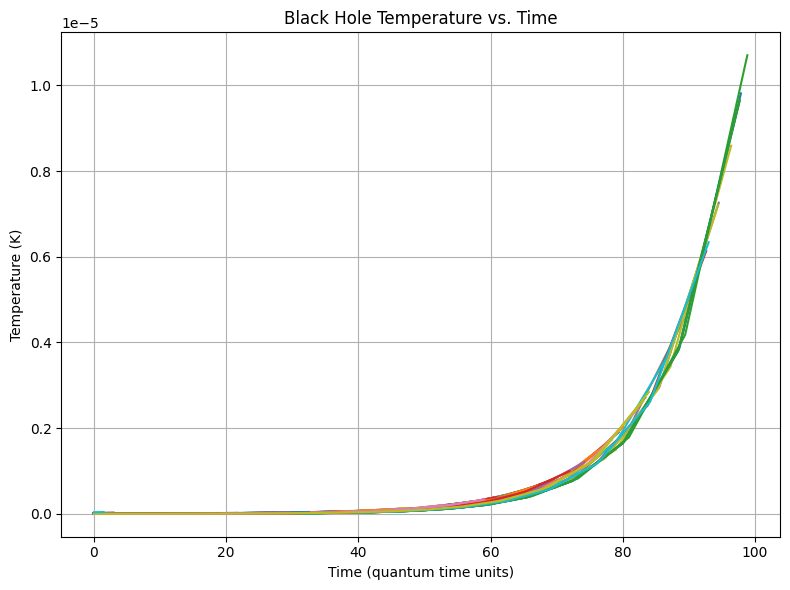

In [38]:
Calc_csv('synthetic_dataset.csv')

## Using Linear Regression to Predict the values

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def Calc(csv_file):
    dataset = pd.read_csv(csv_file)

    X = dataset[['Initial_Mass']]

    time_columns = [col for col in dataset.columns if col.startswith('time_')]
    time_data = dataset[time_columns]

    plt.figure(figsize=(8, 6))

    for i, (_, time_series) in enumerate(time_data.iterrows()):
     
        model = LinearRegression()
        model.fit(X, time_series)

        predicted_time_series = model.predict(X)
  
        plt.plot(time_series, label=f"Actual Time Series {i+1}",color='red')

        plt.plot(predicted_time_series, linestyle='dashed', label=f"Predicted Time Series {i+1}",color='blue')

    plt.xlabel("Time (quantum time units)")
    plt.ylabel("Temperature (K)")
    plt.title("Actual vs Predicted Time Series")
    plt.tight_layout()
    plt.show()




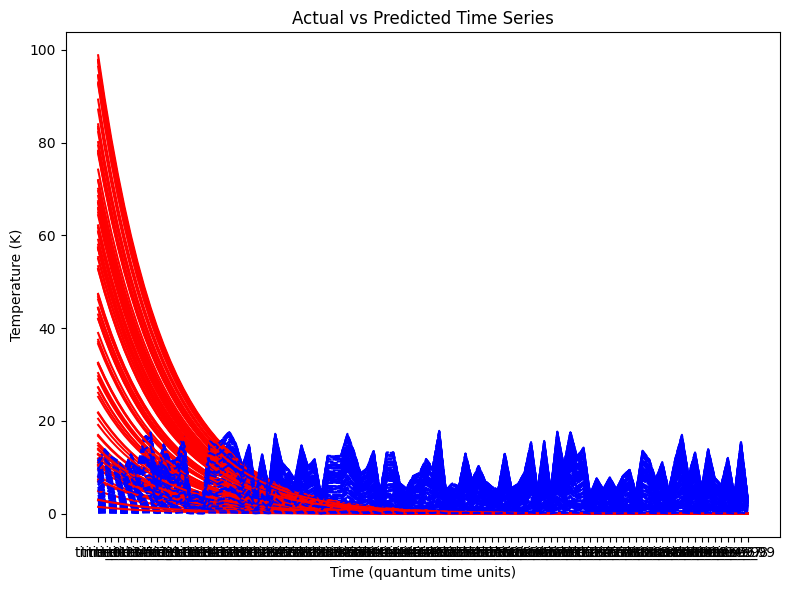

In [40]:
# Example usage:
Calc('synthetic_dataset.csv')

Stephen Hawking's black hole temperature formula is derived from quantum field theory and black hole thermodynamics. It states that black holes are not completely black but emit thermal radiation due to quantum effects near the event horizon. The temperature of this radiation is inversely proportional to the mass of the black hole. The formula is given by:

[T = (ħ   c^3 ) / ( 8  π  G  M)]

Where:
- **T** is the Hawking temperature.
- **ħ** is the reduced Planck constant.
- **c** is the speed of light in vacuum.
- **G** is the gravitational constant.
- **M** is the mass of the black hole.

- Reduced Planck constant (ħ): Approximately 6.62607015 × 10^-34 m² kg/s
- Speed of light in vacuum (c): Approximately 299,792,458 m/s
- Gravitational constant (G): Approximately 6.67430 × 10^-11 m³/kg/s²


This formula suggests that smaller black holes have higher temperatures and thus radiate more energy. As a black hole loses energy through Hawking radiation, its mass decreases, and its temperature increases, leading to a runaway process known as black hole evaporation.
